In [1]:
# TODO LIST
# Read
# Display
# * Convert to grayscale
# * Convert to RGB
# Crop
# Resize
# Flip
# Split channels

# For more on colorspaces: look into HSV/HSB, LAB

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# List all files in data dir
image_paths = glob.glob("data/*")
print(image_paths)

image_path = "data/catdog.png"

['data\\catdog.jpg', 'data\\catdog.png', 'data\\Googled.jpg']


<IPython.core.display.Javascript object>

In [4]:
# Pixels range from 0 - 255
# black - white

# BGR
# (0, 0, 0) - (255, 255, 255)

# Grayscale
# 0 - 255

<IPython.core.display.Javascript object>

In [5]:
image = cv2.imread(image_path)

# Image is in BGR format in OpenCV by default
print(image.shape)
# (1091, 920, 3)
# (height, width, depth)

print(image.dtype)

(1091, 920, 3)
uint8


<IPython.core.display.Javascript object>

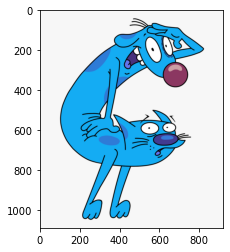

<IPython.core.display.Javascript object>

In [6]:
# Colors are off because we are in BGR and matplotlib expects RGB
plt.imshow(image)
plt.show()

In [7]:
def imshow_cv2plt(bgr_img):
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

<IPython.core.display.Javascript object>

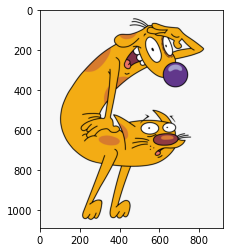

<IPython.core.display.Javascript object>

In [8]:
# Convert to rgb for display
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.show()

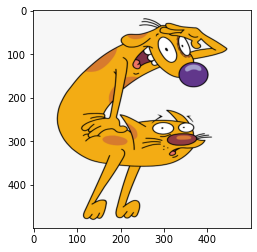

<IPython.core.display.Javascript object>

In [9]:
# known: w, h, either new_h/new_w
# w / h = new_w / new_h


def resize(img, width=None, height=None):
    h, w = img.shape[:2]

    if width is not None and height is not None:
        pass
    elif width is not None:
        height = width * (h / w)
        height = round(height)
    elif height is not None:
        width = height * (w / h)
        width = round(width)
    else:
        raise ValueError("No dimensions provided")

    resized = cv2.resize(image, (width, height))
    return resized


resized = resize(image, width=500, height=500)
imshow_cv2plt(resized)

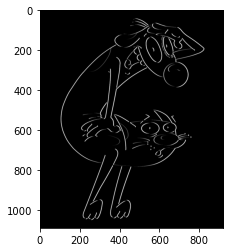

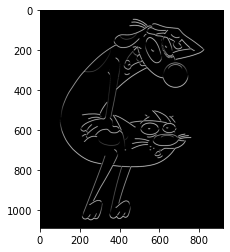

<IPython.core.display.Javascript object>

In [10]:
# fmt: off
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])
# fmt: on

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
x_edges = cv2.filter2D(gray, -1, sobel_x)

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
y_edges = cv2.filter2D(gray, -1, sobel_y)
edges = x_edges + y_edges
imshow_cv2plt(x_edges)
imshow_cv2plt(y_edges)

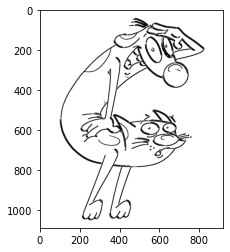

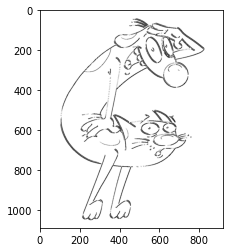

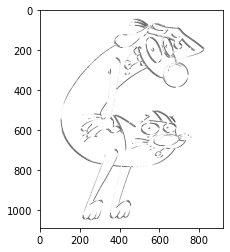

<IPython.core.display.Javascript object>

In [11]:
__, threshed = cv2.threshold(edges, 10, 255, cv2.THRESH_BINARY_INV)
imshow_cv2plt(threshed)
__, threshed = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY_INV)
imshow_cv2plt(threshed)
__, threshed = cv2.threshold(edges, 200, 255, cv2.THRESH_BINARY_INV)
imshow_cv2plt(threshed)

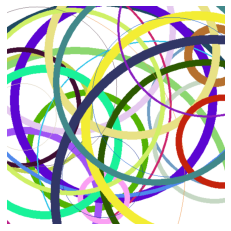

<IPython.core.display.Javascript object>

In [12]:
import random

w = 512

image = 255 * np.ones((w, w, 3), dtype="uint8")
n_circles = 30


for i in range(n_circles):
    x = random.randint(0, w)
    y = random.randint(0, w)

    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)

    radius = random.randint(10, 420)
    thickness = random.randint(-1, 20)
    cv2.circle(image, (x, y), radius, (r, b, g), thickness)
plt.axis("off")
imshow_cv2plt(image)


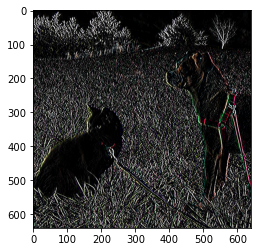

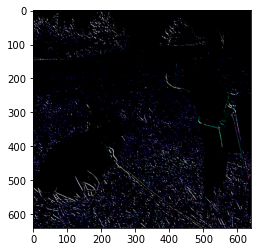

<IPython.core.display.Javascript object>

In [13]:
image_path = "data/catdog.jpg"
image = cv2.imread(image_path)
# fmt:0ff
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[-1, -2, -1], [2, 0, -2], [1, 2, -1]])

# fmt:on
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
x_edges = cv2.filter2D(image, -1, sobel_x)
y_edges = cv2.filter2D(image, -1, sobel_y)
imshow_cv2plt(x_edges)
imshow_cv2plt(y_edges)

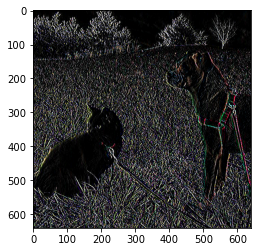

<IPython.core.display.Javascript object>

In [14]:
edges = x_edges + y_edges
imshow_cv2plt(edges)

In [15]:
blurred = cv2.imread(image_path)
blurred = resize(blurred, width=100)
blurred[470:800, 360:750] = cv2.blur(blurred[470:800, 360:750], (5, 5))
imshow_cv2plt(blurred)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


<IPython.core.display.Javascript object>

In [ ]:
# Weighted average of channels (green is more important to human eye rods/cones/bio bs)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)

plt.imshow(gray, cmap="gray")
plt.show()

In [ ]:
# Manual grayscale taking uniformly weighted average
manual_gray = image.mean(axis=2)

plt.imshow(manual_gray, cmap="gray")
plt.show()

In [ ]:
cropped = image[:400, 400:700]
imshow_cv2plt(cropped)

In [ ]:
# def resize(img, width, height)
width = 500
height = 200

resized = cv2.resize(image, (width, height))
imshow_cv2plt(resized)

In [ ]:
h, w = image.shape[:2]
aspect_ratio = w / h
aspect_ratio

In [ ]:
#  1 flip horizontally / flip around the y axis
#  0 flip vertically / flip around the x axis
#  -1 flip vertical and horizontal / flip around both axes
flipped = cv2.flip(image, -1)
imshow_cv2plt(flipped)

In [ ]:
b, g, r = cv2.split(image)

plt.imshow(r, cmap="gray")
plt.show()

In [ ]:
# This cant be best practice, look up a better way it you want to do this
red = image.copy()
# zero out blue/green channels
red[:, :, :2] = 0
imshow_cv2plt(red)

green = image.copy()
# zero out blue/red channels
green[:, :, 0] = 0
green[:, :, 2] = 0
imshow_cv2plt(green)

blue = image.copy()
# zero out green/red channels
blue[:, :, 1:] = 0
imshow_cv2plt(blue)

In [ ]:
canvas = np.zeros((500, 500, 3), dtype="uint8")
cv2.circle(canvas, (200, 200), 50, (255, 0, 0), -1)
cv2.rectangle(canvas, (200, 200), (450, 450), (0, 255, 0), -1)

imshow_cv2plt(canvas)
gray = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
_,threshed = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


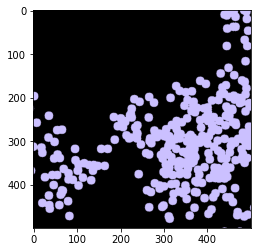

<IPython.core.display.Javascript object>

In [16]:

w = 500
h = 500
cx = w//2
cy = h//2
canvas = np.zeros((w,h,3), dtype = "uint8")
n_steps = 10000
x = cx
y = cy
for _ in range(n_steps):
    x += np.random.randint(-50, 50)
    y += np.random.randint(-50, 50)
    cv2.circle(canvas, (x,y), 10, (255, 192, 203), -1)
    
    #For animation
    cv2.imshow("Animation", canvas)
    key = cv2.waitKey(50)
    
    if key ==27:
        break
        
        
cv2.destroyAllWindows()
imshow_cv2plt(canvas)



In [ ]:
canvas = np.zeros((500, 500, 3), dtype="uint8")
